# <center>Лабораторна робота № 2.<br> Аналіз даних про пасажирів лайнеру "Титанік"</center>

**В завданні пропонується за допомогою Pandas відповісти на декілька питань за даними репозиторія Kaggle (https://www.kaggle.com/c/titanic/data) (качати дані не потрібно – вони вже є в директорії роботи).**


In [3]:
import numpy as np
import pandas as pd

**Зчитати дані з файлу в пам'ять у вигляді об'єкта Pandas.DataFrame**

In [4]:
data = pd.read_csv('lab2/data/titanic_train.csv', index_col='PassengerId')

**Дані представлені у вигляді таблиці. Подивимося на перші 5 рядків:**

In [5]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для прикладу відберемо пасажирів, які сіли в Cherbourg (Embarked=C) і заплатили більше 200$ за білет (fare > 200).**

Переконайтеся, що Ви розумієте, як ця конструкція працює. <br>
Якщо ні – подивіться як обчислюється вираз в квадратних дужках.

In [7]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можна відсортувати цих людей за зменшенням плати за білет.**

In [8]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Приклад створення ознаки.**

In [9]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [10]:
age_categories = [age_category(age) for age in data.Age]

In [11]:
data['Age_category'] = age_categories

**Інший спосіб – через `apply`.**

In [12]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Скільки чоловіків / жінок знаходилося на борту?**
- 412 чоловіків і 479 жінок
- 314 чоловіків і 577 жінок
- 479 чоловіків і 412 жінок
- 577 чоловіків і 314 жінок

In [16]:
gender_counts = data['Sex'].value_counts()
print(f"{gender_counts['male']} чоловіків і {gender_counts['female']} жінок")

577 чоловіків і 314 жінок


**2. Виведіть розподіл змінної `Pclass` (соціально-економічний статус) і цей же розподіл, тілько для чоловіків / жінок окремо. Скільки було чоловіків 2-го класу?**
- 104
- 108
- 112
- 125

In [20]:
print("Загальний розподіл:")
pclass_distribution = data['Pclass'].value_counts().sort_index()
print(pclass_distribution)

print("\nРозподіл для чоловіків:")
print(data[data['Sex'] == 'male']['Pclass'].value_counts().sort_index())

print("\nРозподіл для жінок:")
print(data[data['Sex'] == 'female']['Pclass'].value_counts().sort_index())

male_2nd_class = len(data[(data['Sex'] == 'male') & (data['Pclass'] == 2)])
print(f"\nКількість чоловіків 2-го класу: {male_2nd_class}")

Загальний розподіл:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Розподіл для чоловіків:
Pclass
1    122
2    108
3    347
Name: count, dtype: int64

Розподіл для жінок:
Pclass
1     94
2     76
3    144
Name: count, dtype: int64

Кількість чоловіків 2-го класу: 108


**3. Які значення медіани і стандартного відхилення платежів (`Fare`)? Виконайте округлення до 2 десяткових знаків.**
- Медіана – 14.45, стандартне відхилення – 49.69
- Медіана – 15.1,  стандартне відхилення – 12.15
- Медіана – 13.15, стандартне відхилення – 35.3
- Медіана – 17.43, стандартне відхилення – 39.1

In [ ]:
fare_median = data['Fare'].median()
fare_std = data['Fare'].std()

print(f"Медіана – {fare_median:.2f}, стандартне відхилення – {fare_std:.2f}")

Медіана – 14.45, стандартне відхилення – 49.69


**4. Чи правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Яка частка виживших в обох групах?**
- 22.7% серед молодих і 40.6% серед старих
- 40.6% серед молодих і 22.7% серед старих
- 35.3% серед молодих і 27.4% серед старих
- 27.4% серед молодих і 35.3% серед старих

In [ ]:
young_passengers = data[data['Age'] < 30]
young_survived = young_passengers['Survived'].sum()
young_total = len(young_passengers)
young_survival_rate = (young_survived / young_total) * 100

old_passengers = data[data['Age'] > 60]
old_survived = old_passengers['Survived'].sum()
old_total = len(old_passengers)
old_survival_rate = (old_survived / old_total) * 100

comparison = f"{young_survival_rate:.1f}% серед молодих і {old_survival_rate:.1f}% серед старих"
if young_survival_rate > old_survival_rate:
    print(f"  ТАК - молодші 30 років виживали частіше. {comparison}")
else:
    print(f"  НІ - молодші 30 років виживали рідше. {comparison}")


ВИСНОВОК:
  ТАК - молодші 30 років виживали частіше. 40.6% серед молодих і 22.7% серед старих


**5. Чи правда, що жінки виживали частіше чоловіків? Яка частка виживших в обох групах?**
- 30.2% серед чоловіків і 46.2% серед жінок
- 35.7% серед чоловіків і 74.2% серед жінок
- 21.1% серед чоловіків і 46.2% серед жінок
- 18.9% серед чоловіків і 74.2% серед жінок

In [ ]:
male_passengers = data[data['Sex'] == 'male']
male_survived = male_passengers['Survived'].sum()
male_total = len(male_passengers)
male_survival_rate = (male_survived / male_total) * 100

female_passengers = data[data['Sex'] == 'female']
female_survived = female_passengers['Survived'].sum()
female_total = len(female_passengers)
female_survival_rate = (female_survived / female_total) * 100

comparison = f"{male_survival_rate:.1f}% серед чоловіків і {female_survival_rate:.1f}% серед жінок"
if female_survival_rate > male_survival_rate:
    print(f"ТАК - жінки виживали частіше. {comparison}")
else:
    print(f"НІ - жінки виживали рідше. {comparison}")

ТАК - жінки виживали частіше. 18.9% серед чоловіків і 74.2% серед жінок


**6. Знайдіть найбільш популярні імена серед пасажирів Титаніку чоловічої статі**
- Charles
- Thomas
- William
- John

In [43]:
male_names = data[data['Sex'] == 'male']['Name']

def extract_first_name(name):
    parts = name.split('. ')
    if len(parts) > 1:
        first_name = parts[1].split()[0]
        return first_name
    return None

first_names = male_names.apply(extract_first_name).dropna()

name_counts = first_names.value_counts()

print("Топ-5 найпопулярніших імен серед чоловіків:")
print(name_counts.head(5))

Топ-5 найпопулярніших імен серед чоловіків:
Name
William    35
John       25
George     14
Thomas     13
Charles    13
Name: count, dtype: int64


**7. Порівняйте графічно розподіли вартості білетів і віку у врятованих та загиблих. Середній вік загиблих вище, правильно?**
- Так 
- Ні

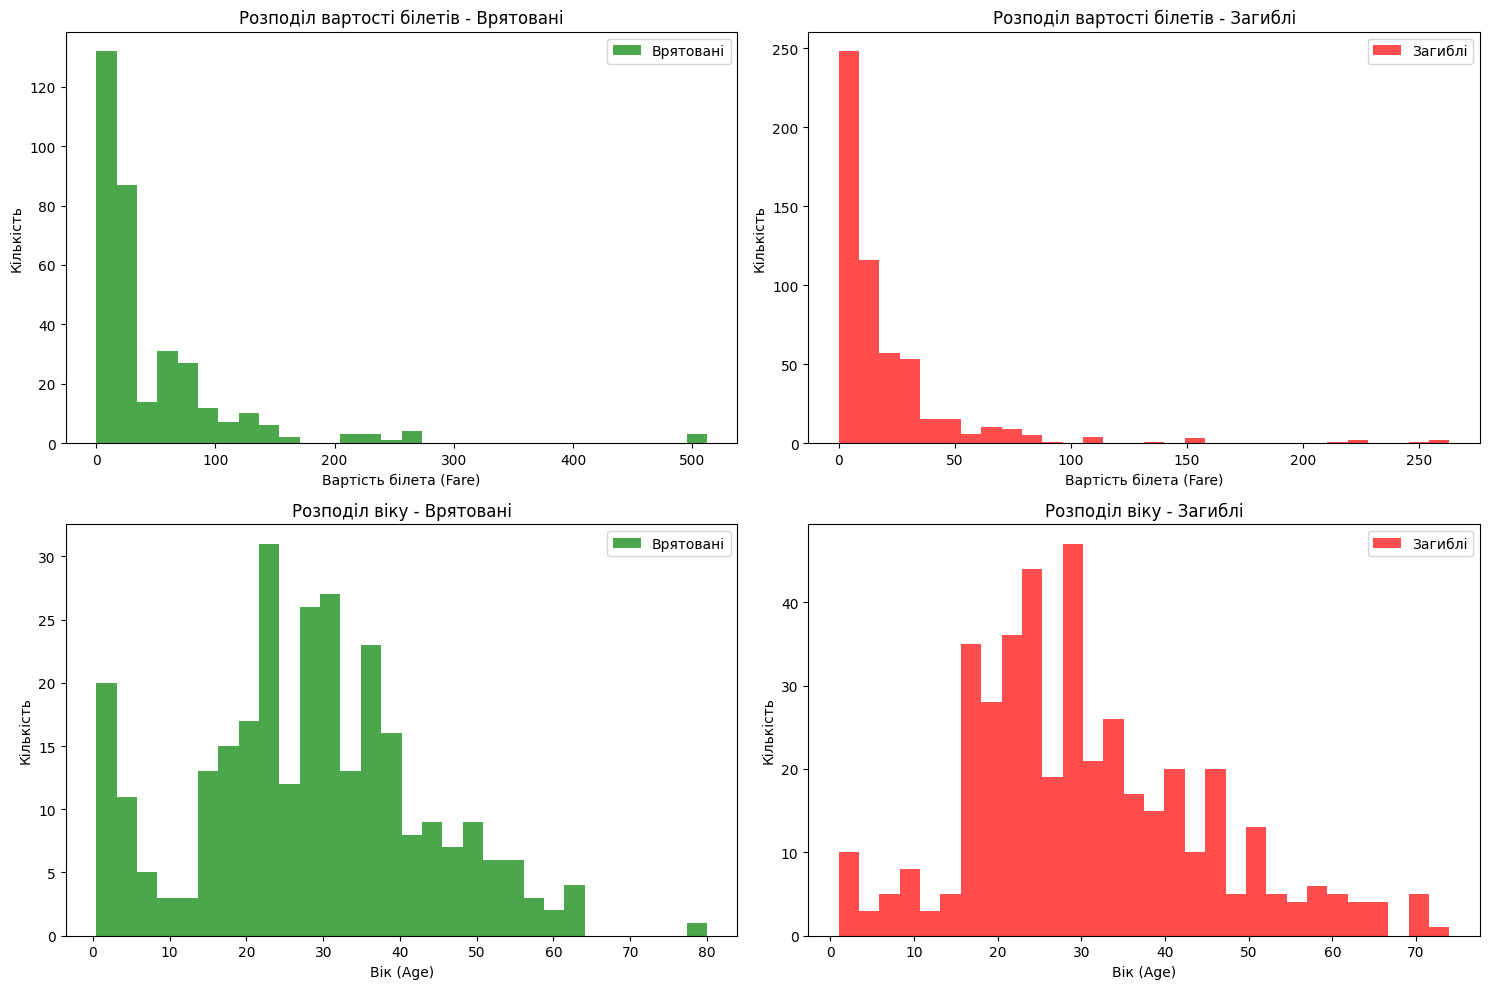

ТАК - середній вік загиблих вище. У врятованих - 28.3, у загиблих: 30.6


In [ ]:
import matplotlib.pyplot as plt

survived = data[data['Survived'] == 1]
died = data[data['Survived'] == 0]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(survived['Fare'].dropna(), bins=30, alpha=0.7, color='green', label='Врятовані')
axes[0, 0].set_title('Розподіл вартості білетів - Врятовані')
axes[0, 0].set_xlabel('Вартість білета (Fare)')
axes[0, 0].set_ylabel('Кількість')
axes[0, 0].legend()

axes[0, 1].hist(died['Fare'].dropna(), bins=30, alpha=0.7, color='red', label='Загиблі')
axes[0, 1].set_title('Розподіл вартості білетів - Загиблі')
axes[0, 1].set_xlabel('Вартість білета (Fare)')
axes[0, 1].set_ylabel('Кількість')
axes[0, 1].legend()

axes[1, 0].hist(survived['Age'].dropna(), bins=30, alpha=0.7, color='green', label='Врятовані')
axes[1, 0].set_title('Розподіл віку - Врятовані')
axes[1, 0].set_xlabel('Вік (Age)')
axes[1, 0].set_ylabel('Кількість')
axes[1, 0].legend()

axes[1, 1].hist(died['Age'].dropna(), bins=30, alpha=0.7, color='red', label='Загиблі')
axes[1, 1].set_title('Розподіл віку - Загиблі')
axes[1, 1].set_xlabel('Вік (Age)')
axes[1, 1].set_ylabel('Кількість')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

survived_mean_age = survived['Age'].mean()
died_mean_age = died['Age'].mean()

comparison = f"У врятованих - {survived_mean_age:.1f}, у загиблих: {died_mean_age:.1f}"
if died_mean_age > survived_mean_age:
    print(f"ТАК - середній вік загиблих вище. {comparison}")
else:
    print(f"НІ - середній вік загиблих не вище. {comparison}")

**8. Як відрізняється середній вік чоловіків / жінок в залежності від класу обслуговування? Оберіть правильні твердження:**
- В середньому чоловіки 1-го класу старші 40 років
- В середньому жінки 1-го класу старші 40 років
- Чоловіки всіх класів в середньому старші жінок того ж класу
- В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу

In [53]:
male_class1_age = data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Age'].mean()
result1 = male_class1_age > 40
print(f"В середньому чоловіки 1-го класу старші 40 років - {result1}")

female_class1_age = data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Age'].mean()
result2 = female_class1_age > 40
print(f"В середньому жінки 1-го класу старші 40 років - {result2}")

result3 = True
for pclass in [1, 2, 3]:
    male_age = data[(data['Sex'] == 'male') & (data['Pclass'] == pclass)]['Age'].mean()
    female_age = data[(data['Sex'] == 'female') & (data['Pclass'] == pclass)]['Age'].mean()
    if not (male_age > female_age):
        result3 = False
print(f"Чоловіки всіх класів в середньому старші жінок того ж класу - {result3}")

overall_class1_age = data[data['Pclass'] == 1]['Age'].mean()
overall_class2_age = data[data['Pclass'] == 2]['Age'].mean()
overall_class3_age = data[data['Pclass'] == 3]['Age'].mean()
result4 = (overall_class1_age > overall_class2_age) and (overall_class1_age > overall_class3_age)
print(f"В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу - {result4}")

В середньому чоловіки 1-го класу старші 40 років - True
В середньому жінки 1-го класу старші 40 років - False
Чоловіки всіх класів в середньому старші жінок того ж класу - True
В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу - True
